In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('HomeC.csv', low_memory=False)
df = df[:-1]
df['time'] = pd.to_numeric(df['time'])
df['Timestamp'] = pd.to_datetime(df['time'], unit='s')
df.set_index('Timestamp', inplace=True)
print(df.head())

                           time  use [kW]  gen [kW]  House overall [kW]  \
Timestamp                                                                 
2016-01-01 05:00:00  1451624400  0.932833  0.003483            0.932833   
2016-01-01 05:00:01  1451624401  0.934333  0.003467            0.934333   
2016-01-01 05:00:02  1451624402  0.931817  0.003467            0.931817   
2016-01-01 05:00:03  1451624403  1.022050  0.003483            1.022050   
2016-01-01 05:00:04  1451624404  1.139400  0.003467            1.139400   

                     Dishwasher [kW]  Furnace 1 [kW]  Furnace 2 [kW]  \
Timestamp                                                              
2016-01-01 05:00:00         0.000033        0.020700        0.061917   
2016-01-01 05:00:01         0.000000        0.020717        0.063817   
2016-01-01 05:00:02         0.000017        0.020700        0.062317   
2016-01-01 05:00:03         0.000017        0.106900        0.068517   
2016-01-01 05:00:04         0.000133      

time                     int64
use [kW]               float64
gen [kW]               float64
House overall [kW]     float64
Dishwasher [kW]        float64
Furnace 1 [kW]         float64
Furnace 2 [kW]         float64
Home office [kW]       float64
Fridge [kW]            float64
Wine cellar [kW]       float64
Garage door [kW]       float64
Kitchen 12 [kW]        float64
Kitchen 14 [kW]        float64
Kitchen 38 [kW]        float64
Barn [kW]              float64
Well [kW]              float64
Microwave [kW]         float64
Living room [kW]       float64
Solar [kW]             float64
temperature            float64
icon                    object
humidity               float64
visibility             float64
summary                 object
apparentTemperature    float64
pressure               float64
windSpeed              float64
cloudCover              object
windBearing            float64
precipIntensity        float64
dewPoint               float64
precipProbability      float64
dtype: o

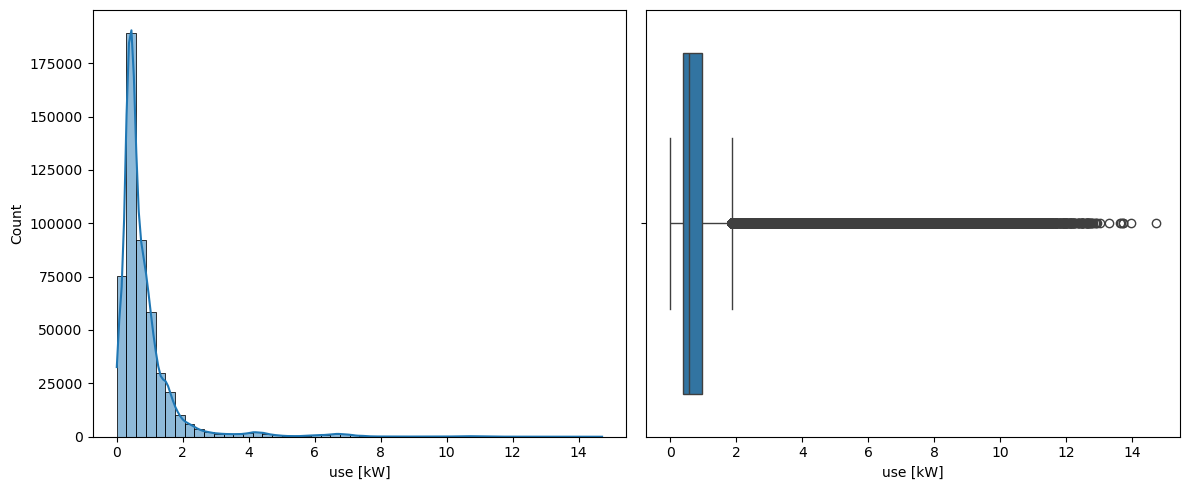

In [10]:
print(df.dtypes)
print(df.isnull().sum())
df.ffill(inplace=True)
print(df.duplicated().sum())
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['use [kW]'], bins=50, kde=True)
plt.subplot(1, 2, 2)
sns.boxplot(x=df['use [kW]'])
plt.tight_layout()
plt.show()

(503910, 32)
(140, 29)


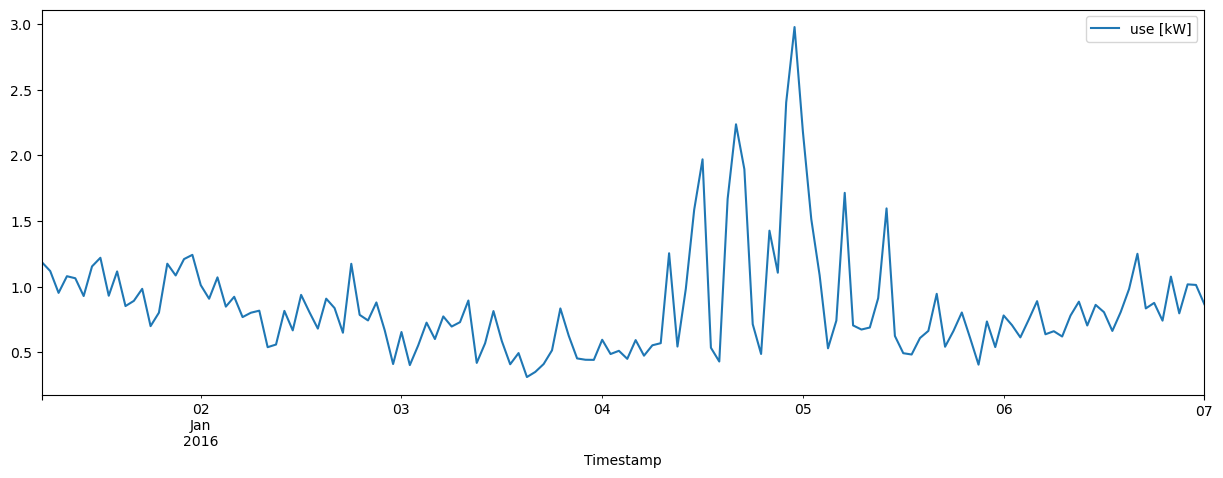

In [11]:
numeric_cols = df.select_dtypes(include=[np.number])
df_hourly = numeric_cols.resample('h').mean()
print(df.shape)
print(df_hourly.shape)
df_hourly[['use [kW]']].plot(figsize=(15, 5))
plt.show()

In [ ]:
df_hourly.to_csv('clean_energy_data.csv')
print("Success! Your clean data is saved as 'clean_energy_data.csv'")